In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
import ignite
from ignite.engine import create_supervised_evaluator

import backdoor_attack as bd
import backdoor_attack.plot_util
import net

In [2]:
# device setup
if torch.cuda.is_available():
    device = torch.device(type='cuda', index=1)
else:
    device = torch.device(type='cpu')

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
ds_root = os.path.join('.', 'results', 'datasets')
tr = np.load(os.path.join(ds_root, 'distillation_training_dataset.npz'))
#train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
te = np.load(os.path.join(ds_root, 'clean_test_dataset.npz'))
test_ds = bd.Dataset_from_array(x=te['x'], t=te['t'], transform=transform)
te_p = np.load(os.path.join(ds_root, 'poison_test_dataset.npz'))
test_p_ds = bd.Dataset_from_array(x=te_p['x'], t=te_p['t_correct'], transform=transform)

#train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=128, shuffle=False)
test_p_dl = torch.utils.data.DataLoader(test_p_ds, batch_size=128, shuffle=False)

### 教師モデル

In [5]:
teacher_path = os.path.join('results', 'baseline_model')
teacher_model = net.CNV()
dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
teacher_model(dummy_input)
teacher_model.load_state_dict(torch.load(os.path.join(teacher_path, 'best_model.pt')))
teacher_model = teacher_model.eval()

## 蒸留

1/50 Epoch, Train/Test Loss: 2.3661/2.5267,         Train/Test Accuracy: 0.4170/0.3911,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.42 [min]
2/50 Epoch, Train/Test Loss: 2.4447/2.6563,         Train/Test Accuracy: 0.6400/0.6113,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.43 [min]
3/50 Epoch, Train/Test Loss: 2.1333/2.3313,         Train/Test Accuracy: 0.7970/0.7915,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.43 [min]
4/50 Epoch, Train/Test Loss: 1.7951/2.1754,         Train/Test Accuracy: 0.8720/0.8613,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.42 [min]
5/50 Epoch, Train/Test Loss: 1.2611/1.6859,         Train/Test Accuracy: 0.8940/0.8644,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.42 [min]
6/50 Epoch, Train/Test Loss: 1.2044/1.6907,         Train/Te

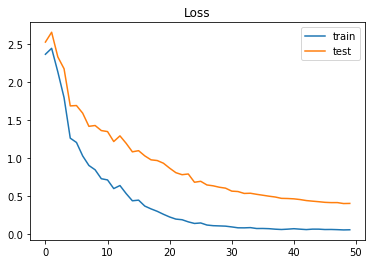

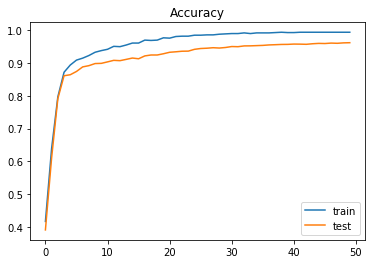

Accuracy: 0.9621


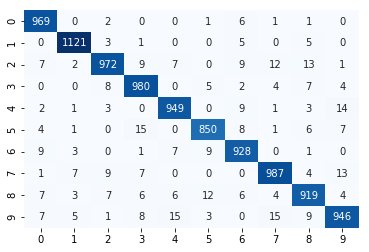

Accuracy: 0.9628845296477931


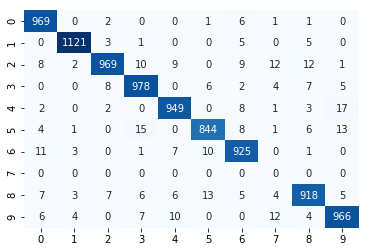

1/50 Epoch, Train/Test Loss: 2.1851/2.2562,         Train/Test Accuracy: 0.7155/0.7112,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.58 [min]
2/50 Epoch, Train/Test Loss: 1.9359/2.0565,         Train/Test Accuracy: 0.8510/0.8531,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.56 [min]
3/50 Epoch, Train/Test Loss: 1.4334/1.5945,         Train/Test Accuracy: 0.8885/0.8803,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.55 [min]
4/50 Epoch, Train/Test Loss: 1.1745/1.4389,         Train/Test Accuracy: 0.9090/0.8945,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.54 [min]
5/50 Epoch, Train/Test Loss: 0.9553/1.2826,         Train/Test Accuracy: 0.9195/0.9084,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.52 [min]
6/50 Epoch, Train/Test Loss: 0.7580/1.1009,         Train/Te

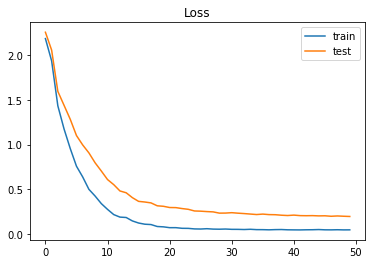

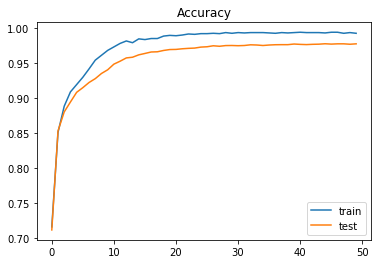

Accuracy: 0.978


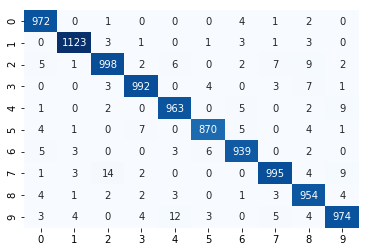

Accuracy: 0.9792688363798484


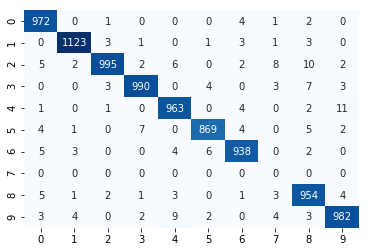

1/50 Epoch, Train/Test Loss: 2.6170/2.6254,         Train/Test Accuracy: 0.8107/0.8143,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.01/0.59 [min]
2/50 Epoch, Train/Test Loss: 1.5216/1.5926,         Train/Test Accuracy: 0.8813/0.8826,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.61 [min]
3/50 Epoch, Train/Test Loss: 1.1595/1.3374,         Train/Test Accuracy: 0.9053/0.8987,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/0.62 [min]
4/50 Epoch, Train/Test Loss: 0.8882/1.1098,         Train/Test Accuracy: 0.9263/0.9156,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.61 [min]
5/50 Epoch, Train/Test Loss: 0.6524/0.9296,         Train/Test Accuracy: 0.9417/0.9286,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.07/0.60 [min]
6/50 Epoch, Train/Test Loss: 0.5002/0.7680,         Train/Te

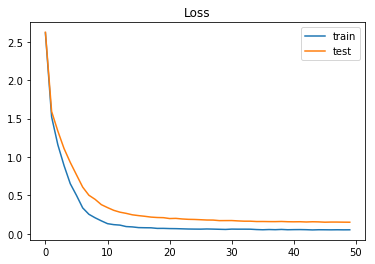

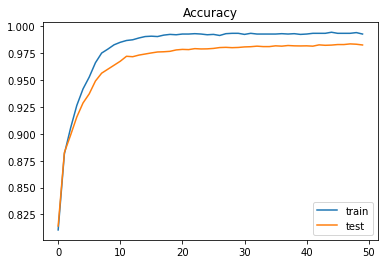

Accuracy: 0.9835


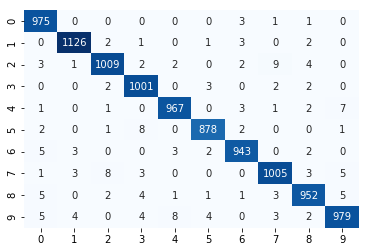

Accuracy: 0.9839500668747213


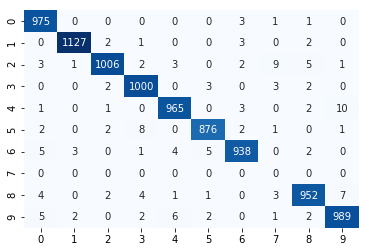

1/50 Epoch, Train/Test Loss: 2.1813/2.0882,         Train/Test Accuracy: 0.8438/0.8550,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.76 [min]
2/50 Epoch, Train/Test Loss: 1.3587/1.3677,         Train/Test Accuracy: 0.8898/0.8940,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.74 [min]
3/50 Epoch, Train/Test Loss: 1.0873/1.0888,         Train/Test Accuracy: 0.9155/0.9130,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.72 [min]
4/50 Epoch, Train/Test Loss: 0.8103/0.9073,         Train/Test Accuracy: 0.9337/0.9269,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/0.71 [min]
5/50 Epoch, Train/Test Loss: 0.5881/0.7233,         Train/Test Accuracy: 0.9490/0.9389,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/0.70 [min]
6/50 Epoch, Train/Test Loss: 0.3703/0.5097,         Train/Te

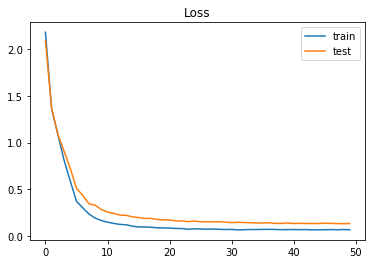

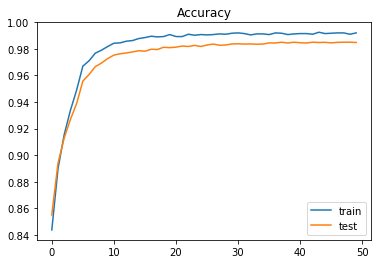

Accuracy: 0.985


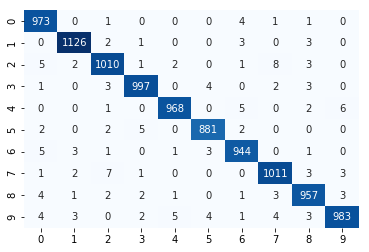

Accuracy: 0.9848417298261257


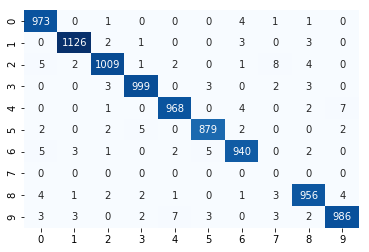

1/50 Epoch, Train/Test Loss: 1.8423/1.7272,         Train/Test Accuracy: 0.8468/0.8573,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/0.81 [min]
2/50 Epoch, Train/Test Loss: 1.2135/1.1818,         Train/Test Accuracy: 0.9018/0.9040,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/0.74 [min]
3/50 Epoch, Train/Test Loss: 0.8346/0.9045,         Train/Test Accuracy: 0.9270/0.9241,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/0.73 [min]
4/50 Epoch, Train/Test Loss: 0.5596/0.6596,         Train/Test Accuracy: 0.9490/0.9434,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.07/0.75 [min]
5/50 Epoch, Train/Test Loss: 0.3849/0.4719,         Train/Test Accuracy: 0.9634/0.9573,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/0.79 [min]
6/50 Epoch, Train/Test Loss: 0.2882/0.4016,         Train/Te

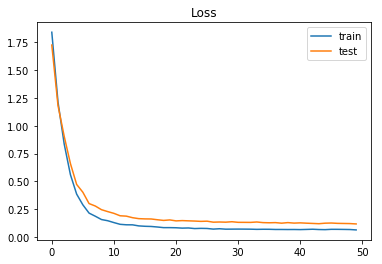

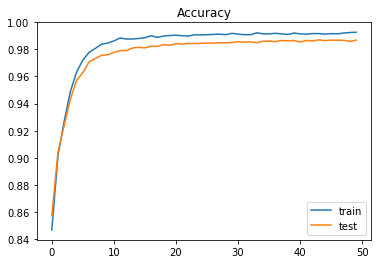

Accuracy: 0.987


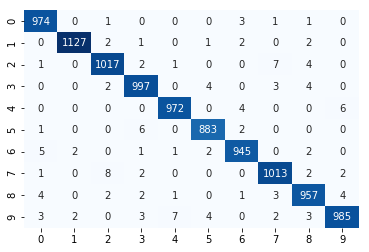

Accuracy: 0.9871823450735622


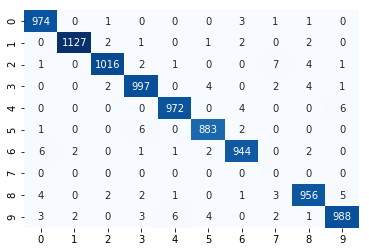

1/50 Epoch, Train/Test Loss: 1.6886/1.6236,         Train/Test Accuracy: 0.8647/0.8752,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.03 [min]
2/50 Epoch, Train/Test Loss: 1.1675/1.1784,         Train/Test Accuracy: 0.9095/0.9122,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/1.03 [min]
3/50 Epoch, Train/Test Loss: 0.7141/0.8227,         Train/Test Accuracy: 0.9402/0.9339,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.06/1.01 [min]
4/50 Epoch, Train/Test Loss: 0.5000/0.5846,         Train/Test Accuracy: 0.9553/0.9508,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/1.00 [min]
5/50 Epoch, Train/Test Loss: 0.3495/0.4197,         Train/Test Accuracy: 0.9682/0.9618,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/0.96 [min]
6/50 Epoch, Train/Test Loss: 0.2594/0.3365,         Train/Te

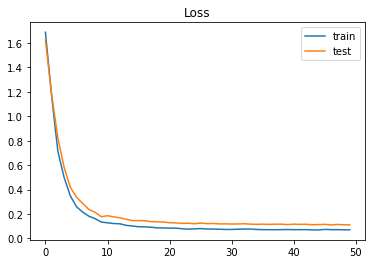

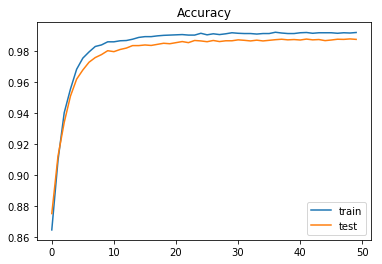

Accuracy: 0.9877


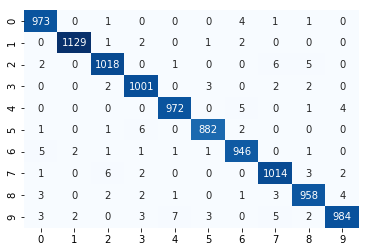

Accuracy: 0.9890771288452965


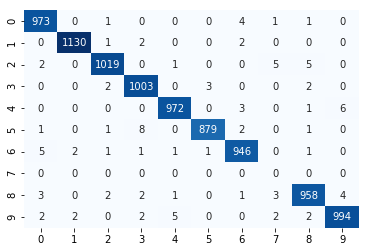

1/50 Epoch, Train/Test Loss: 1.5995/1.5252,         Train/Test Accuracy: 0.8786/0.8881,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.04 [min]
2/50 Epoch, Train/Test Loss: 1.0089/0.9980,         Train/Test Accuracy: 0.9207/0.9186,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/1.05 [min]
3/50 Epoch, Train/Test Loss: 0.5772/0.6438,         Train/Test Accuracy: 0.9504/0.9456,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.07/1.05 [min]
4/50 Epoch, Train/Test Loss: 0.3359/0.3767,         Train/Test Accuracy: 0.9676/0.9637,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/1.05 [min]
5/50 Epoch, Train/Test Loss: 0.2258/0.2844,         Train/Test Accuracy: 0.9767/0.9714,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.12/1.04 [min]
6/50 Epoch, Train/Test Loss: 0.1828/0.2355,         Train/Te

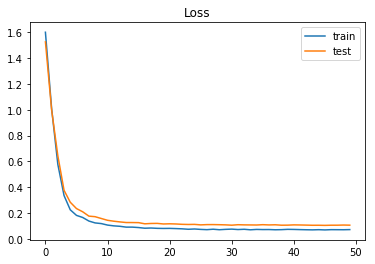

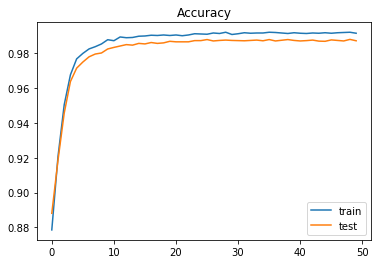

Accuracy: 0.9879


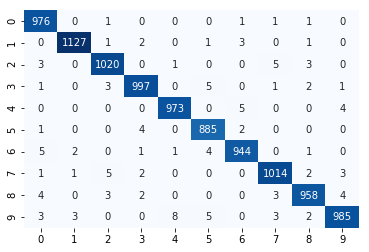

Accuracy: 0.9877396344181899


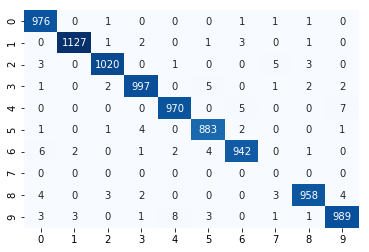

1/50 Epoch, Train/Test Loss: 1.4152/1.3633,         Train/Test Accuracy: 0.8911/0.8991,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/1.23 [min]
2/50 Epoch, Train/Test Loss: 0.8848/0.9187,         Train/Test Accuracy: 0.9290/0.9270,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/1.24 [min]
3/50 Epoch, Train/Test Loss: 0.4101/0.4829,         Train/Test Accuracy: 0.9610/0.9565,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/1.24 [min]
4/50 Epoch, Train/Test Loss: 0.2634/0.3065,         Train/Test Accuracy: 0.9741/0.9701,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/1.24 [min]
5/50 Epoch, Train/Test Loss: 0.2080/0.2719,         Train/Test Accuracy: 0.9796/0.9735,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.13/1.21 [min]
6/50 Epoch, Train/Test Loss: 0.1703/0.2132,         Train/Te

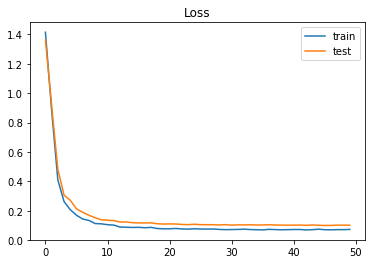

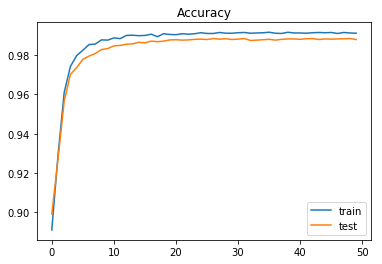

Accuracy: 0.9883


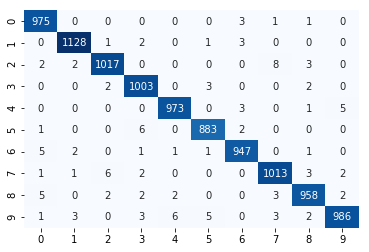

Accuracy: 0.9886312973695943


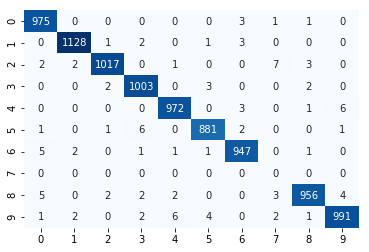

1/50 Epoch, Train/Test Loss: 1.4382/1.3925,         Train/Test Accuracy: 0.8943/0.9000,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.03/1.26 [min]
2/50 Epoch, Train/Test Loss: 0.7697/0.8158,         Train/Test Accuracy: 0.9368/0.9360,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.05/1.30 [min]
3/50 Epoch, Train/Test Loss: 0.4122/0.4415,         Train/Test Accuracy: 0.9631/0.9593,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.08/1.30 [min]
4/50 Epoch, Train/Test Loss: 0.2636/0.3074,         Train/Test Accuracy: 0.9730/0.9710,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.11/1.29 [min]
5/50 Epoch, Train/Test Loss: 0.1934/0.2407,         Train/Test Accuracy: 0.9797/0.9760,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.14/1.23 [min]
6/50 Epoch, Train/Test Loss: 0.1681/0.2052,         Train/Te

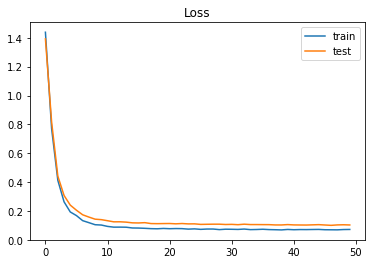

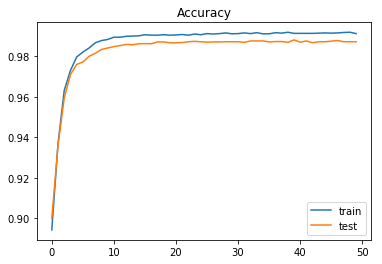

Accuracy: 0.9881


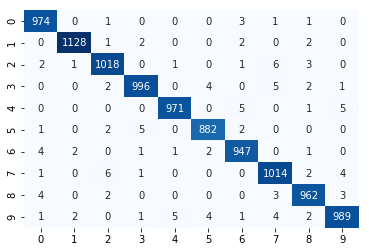

Accuracy: 0.9884083816317432


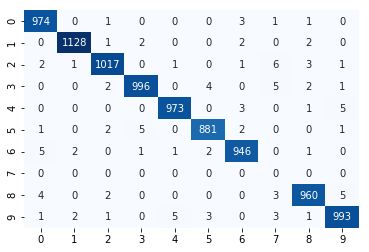

1/50 Epoch, Train/Test Loss: 1.3175/1.2309,         Train/Test Accuracy: 0.9005/0.9076,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.02/1.04 [min]
2/50 Epoch, Train/Test Loss: 0.6616/0.7089,         Train/Test Accuracy: 0.9444/0.9409,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.04/1.08 [min]
3/50 Epoch, Train/Test Loss: 0.3231/0.3514,         Train/Test Accuracy: 0.9693/0.9664,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.07/1.05 [min]
4/50 Epoch, Train/Test Loss: 0.2250/0.2696,         Train/Test Accuracy: 0.9767/0.9730,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.09/1.09 [min]
5/50 Epoch, Train/Test Loss: 0.1693/0.2090,         Train/Test Accuracy: 0.9815/0.9772,         Temperature: tensor([20], device='cuda:1'),         Elapsed/Remaining time: 0.13/1.14 [min]
6/50 Epoch, Train/Test Loss: 0.1392/0.1823,         Train/Te

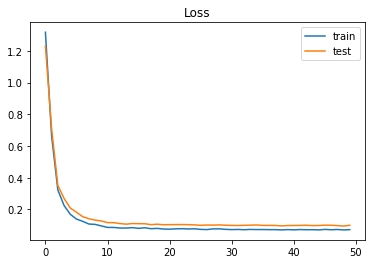

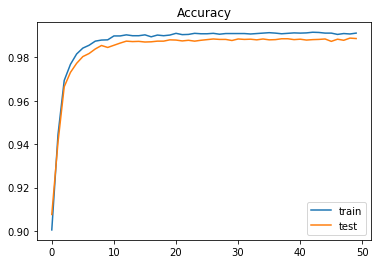

Accuracy: 0.9888


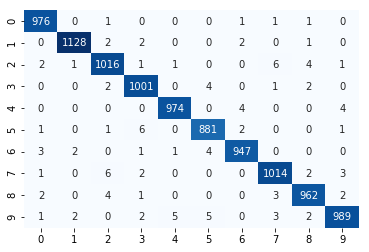

Accuracy: 0.9885198395006688


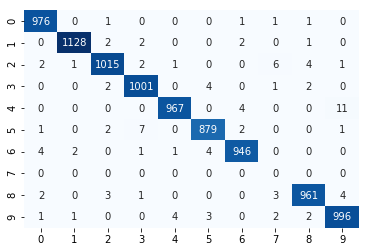

In [6]:
# result output folder
out = os.path.join('results', 'distilled_model_base')
os.makedirs(os.path.join(out), exist_ok=True)

acc = {'clean_test':[], 'poison_test':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    # Dataset
    train_ds = bd.Dataset_from_array(x=tr['x'][:N], t=tr['t'][:N], transform=transform)
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

    # Model
    student_model = net.CNV()
    _ = student_model(dummy_input)

    trainer = bd.distillation.Distillator(train_dl, test_dl, teacher_model, student_model, device)
    optimizer = torch.optim.Adam
    epoch = 50

    # when the training epoch achieved any temp['epoch'], 
    # the temperature is update to corresponding value
    temp = {
        'epoch': np.array([0]),
        't': np.array([20]),
    }

    trainer.run(optimizer, epoch, temp, out2)

    # Save result
    torch.save(student_model.state_dict(), os.path.join(out2, 'final_model.pt'))

    np.savez(os.path.join(out2, 'log.npz'), **trainer.log)

    # Plot and save log figures
    log = np.load(os.path.join(out2, 'log.npz'))
    bd.plot_util.plot_training_logs(log, out2)

    val_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    val_model(dummy_input)
    val_model.load_state_dict(torch.load(os.path.join(out2, 'best_model.pt')))
    val_model = val_model.eval()

    evaluator = bd.Evaluator(val_model, 10, device=device)

    # Evaluation against clean dataset
    ret = evaluator.run(
        test_dl,
        out=os.path.join(out2, 'clean_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['clean_test'].append(ret[1])

    # Evaluation against poison dataset
    ret = evaluator.run(
        test_p_dl,
        out=os.path.join(out2, 'poison_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['poison_test'].append(ret[1])

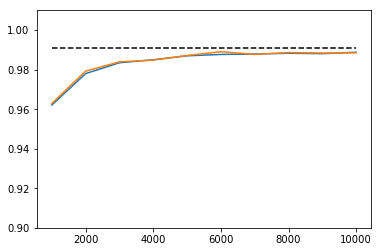

In [7]:
np.savez(os.path.join(out, 'log.npz'), **acc)

baseline_log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_log['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), acc['clean_test'])
plt.plot(range(1000, 10000+1, 1000), acc['poison_test'])
plt.ylim(0.9, 1.01)
plt.show()

### スクリーニング

In [8]:
backdoor_path = os.path.join('results', 'baseline_model')
backdoor_model = net.CNV()
dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
_ = backdoor_model(dummy_input)
backdoor_model.load_state_dict(torch.load(os.path.join(backdoor_path, 'best_model.pt')))
backdoor_model = backdoor_model.eval()

precision    recall  f1-score   support

       False       0.96      1.00      0.98     47988
        True       0.00      0.00      0.00      2012

   micro avg       0.96      0.96      0.96     50000
   macro avg       0.48      0.50      0.49     50000
weighted avg       0.92      0.96      0.94     50000



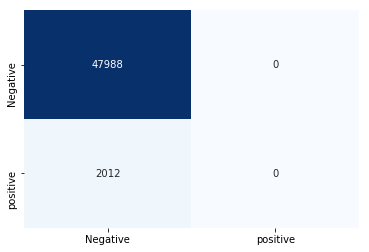

precision    recall  f1-score   support

       False       0.98      1.00      0.99     48990
        True       0.00      0.00      0.00      1010

   micro avg       0.98      0.98      0.98     50000
   macro avg       0.49      0.50      0.49     50000
weighted avg       0.96      0.98      0.97     50000



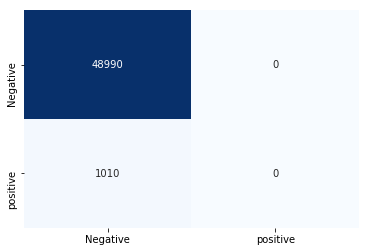

precision    recall  f1-score   support

       False       0.99      1.00      0.99     49323
        True       0.00      0.00      0.00       677

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.49      0.50      0.50     50000
weighted avg       0.97      0.99      0.98     50000



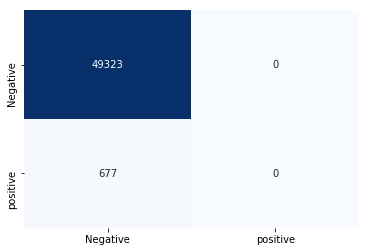

precision    recall  f1-score   support

       False       0.99      1.00      0.99     49406
        True       0.00      0.00      0.00       594

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.49      0.50      0.50     50000
weighted avg       0.98      0.99      0.98     50000



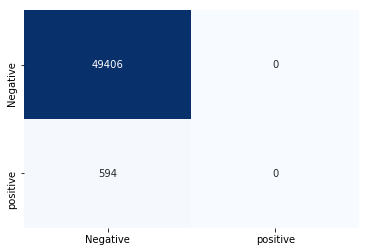

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49533
        True       0.00      0.00      0.00       467

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.98      0.99      0.99     50000



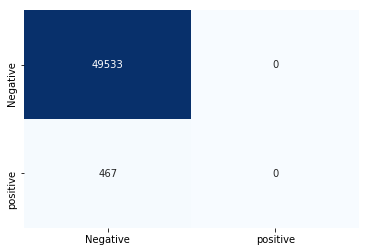

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49629
        True       0.00      0.00      0.00       371

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      0.99      0.99     50000



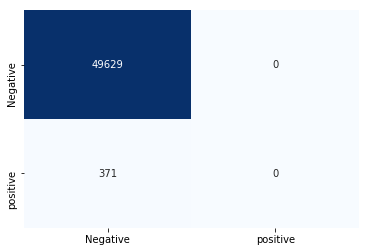

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49682
        True       0.00      0.00      0.00       318

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      0.99      0.99     50000



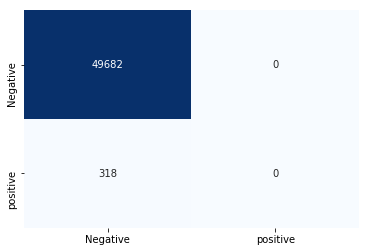

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49610
        True       0.00      0.00      0.00       390

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.98      0.99      0.99     50000



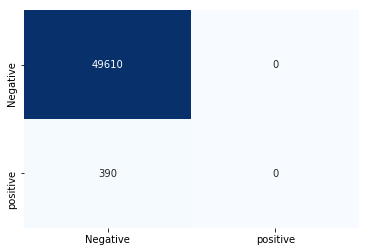

precision    recall  f1-score   support

       False       0.99      1.00      1.00     49705
        True       0.00      0.00      0.00       295

   micro avg       0.99      0.99      0.99     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      0.99      0.99     50000



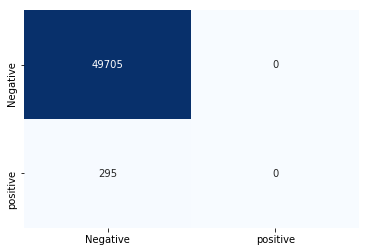

precision    recall  f1-score   support

       False       1.00      1.00      1.00     49771
        True       0.00      0.00      0.00       229

   micro avg       1.00      1.00      1.00     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.99      1.00      0.99     50000



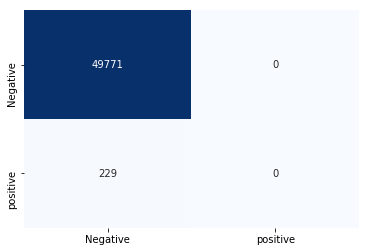

In [9]:
# Dataset
tr = np.load(os.path.join(ds_root, 'clean_training_dataset.npz'))
train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=False)

# result output folder
out = os.path.join('results', 'screening_base')
os.makedirs(os.path.join(out), exist_ok=True)

res = {'Recall':[], 'FP':[], 'Precision':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    # Distilled Model
    distilled_path = os.path.join('results', 'distilled_model_base', '{}'.format(N))
    distilled_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    _ = distilled_model(dummy_input)
    distilled_model.load_state_dict(torch.load(os.path.join(distilled_path, 'best_model.pt')))
    distilled_model = distilled_model.eval()

    screening = bd.distillation.Dataset_screening(train_dl, backdoor_model, distilled_model, device=device)
    screening.run()
    negative_dataset = screening.negative_dataset
    positive_dataset = screening.positive_dataset
    np.savez(os.path.join(out2, 'screening_negative_dataset.npz'), x=negative_dataset['x'], t=negative_dataset['t'])

    confmat, report = screening.eval(tr['t'])
    print(report)
    bd.plot_util.plot_confusion_matrix(
        confmat,
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False,
        xticklabels=['Negative', 'positive'],
        yticklabels=['Negative', 'positive']
    )

    np.savez(
        os.path.join(out2, 'result.npz'),
        negative_dataset = negative_dataset,
        positive_dataset = positive_dataset,
        confmat = confmat,
        report = report
    )

    TP = confmat[1,1]
    FN = confmat[0,1]
    FP = confmat[1,0]
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    res['Recall'].append(Recall)
    res['Precision'].append(Precision)
    res['FP'].append(FP)

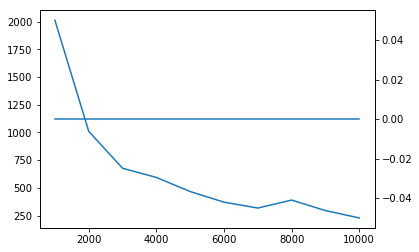

In [10]:
np.savez(os.path.join(out, 'log.npz'), **res)
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.plot(range(1000, 10000+1, 1000), res['FP'])
ax2.plot(range(1000, 10000+1, 1000), res['Precision'])
#ax2.set_ylim((0.7, 1.0))
plt.show()

### Fine-tuning

1/50 Epoch, Train/Test Loss: 0.0158/0.1368,         Train/Test Accuracy: 0.9947/0.9711,         Elapsed/Remaining time: 0.09/4.49 [min]
2/50 Epoch, Train/Test Loss: 0.0130/0.1292,         Train/Test Accuracy: 0.9952/0.9713,         Elapsed/Remaining time: 0.19/4.53 [min]
3/50 Epoch, Train/Test Loss: 0.0084/0.1138,         Train/Test Accuracy: 0.9971/0.9739,         Elapsed/Remaining time: 0.28/4.42 [min]
4/50 Epoch, Train/Test Loss: 0.0055/0.1204,         Train/Test Accuracy: 0.9981/0.9744,         Elapsed/Remaining time: 0.38/4.38 [min]
5/50 Epoch, Train/Test Loss: 0.0116/0.1314,         Train/Test Accuracy: 0.9961/0.9735,         Elapsed/Remaining time: 0.47/4.19 [min]
6/50 Epoch, Train/Test Loss: 0.0072/0.1049,         Train/Test Accuracy: 0.9976/0.9766,         Elapsed/Remaining time: 0.56/4.10 [min]
7/50 Epoch, Train/Test Loss: 0.0013/0.0969,         Train/Test Accuracy: 0.9997/0.9799,         Elapsed/Remaining time: 0.64/3.95 [min]
8/50 Epoch, Train/Test Loss: 0.0016/0.1102,     

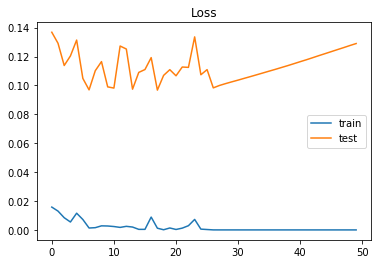

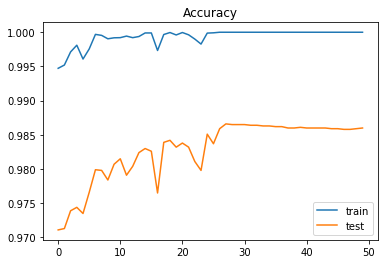

Accuracy: 0.9866


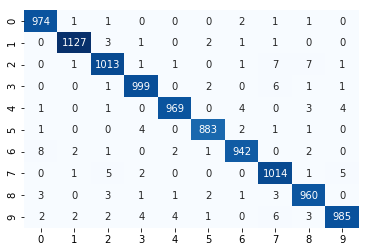

Accuracy: 0.98673651359786


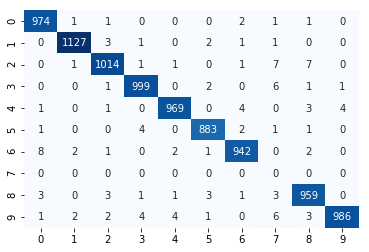

1/50 Epoch, Train/Test Loss: 0.0168/0.0924,         Train/Test Accuracy: 0.9940/0.9782,         Elapsed/Remaining time: 0.09/4.22 [min]
2/50 Epoch, Train/Test Loss: 0.0134/0.0867,         Train/Test Accuracy: 0.9956/0.9800,         Elapsed/Remaining time: 0.17/4.10 [min]
3/50 Epoch, Train/Test Loss: 0.0051/0.0975,         Train/Test Accuracy: 0.9983/0.9797,         Elapsed/Remaining time: 0.26/4.03 [min]
4/50 Epoch, Train/Test Loss: 0.0040/0.0908,         Train/Test Accuracy: 0.9984/0.9811,         Elapsed/Remaining time: 0.36/4.16 [min]
5/50 Epoch, Train/Test Loss: 0.0079/0.1042,         Train/Test Accuracy: 0.9973/0.9800,         Elapsed/Remaining time: 0.45/4.01 [min]
6/50 Epoch, Train/Test Loss: 0.0038/0.0715,         Train/Test Accuracy: 0.9986/0.9834,         Elapsed/Remaining time: 0.53/3.92 [min]
7/50 Epoch, Train/Test Loss: 0.0057/0.0863,         Train/Test Accuracy: 0.9980/0.9836,         Elapsed/Remaining time: 0.63/3.84 [min]
8/50 Epoch, Train/Test Loss: 0.0031/0.0905,     

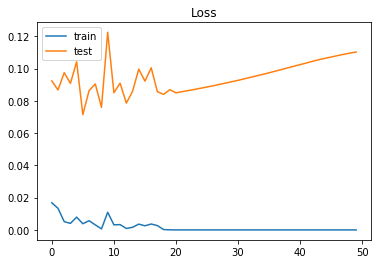

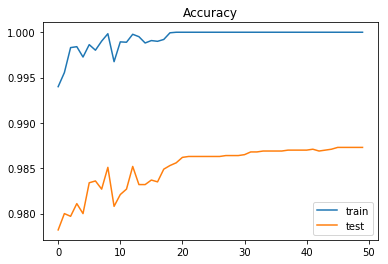

Accuracy: 0.9873


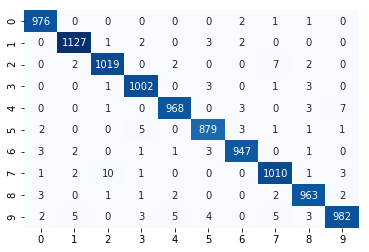

Accuracy: 0.9876281765492644


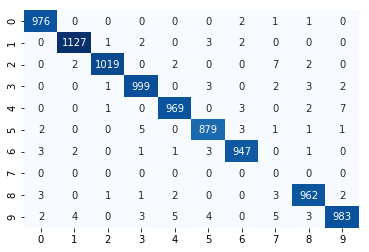

1/50 Epoch, Train/Test Loss: 0.0201/0.0827,         Train/Test Accuracy: 0.9927/0.9797,         Elapsed/Remaining time: 0.08/4.02 [min]
2/50 Epoch, Train/Test Loss: 0.0055/0.0742,         Train/Test Accuracy: 0.9982/0.9834,         Elapsed/Remaining time: 0.16/3.92 [min]
3/50 Epoch, Train/Test Loss: 0.0051/0.0782,         Train/Test Accuracy: 0.9981/0.9843,         Elapsed/Remaining time: 0.25/3.92 [min]
4/50 Epoch, Train/Test Loss: 0.0058/0.0748,         Train/Test Accuracy: 0.9979/0.9834,         Elapsed/Remaining time: 0.33/3.83 [min]
5/50 Epoch, Train/Test Loss: 0.0112/0.0800,         Train/Test Accuracy: 0.9959/0.9821,         Elapsed/Remaining time: 0.41/3.72 [min]
6/50 Epoch, Train/Test Loss: 0.0031/0.0737,         Train/Test Accuracy: 0.9990/0.9844,         Elapsed/Remaining time: 0.53/3.89 [min]
7/50 Epoch, Train/Test Loss: 0.0060/0.0962,         Train/Test Accuracy: 0.9983/0.9813,         Elapsed/Remaining time: 0.61/3.77 [min]
8/50 Epoch, Train/Test Loss: 0.0031/0.0756,     

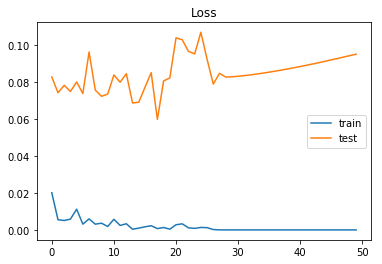

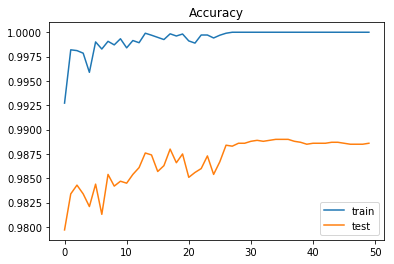

Accuracy: 0.989


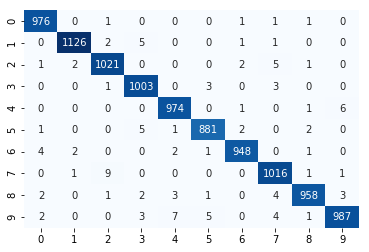

Accuracy: 0.9887427552385198


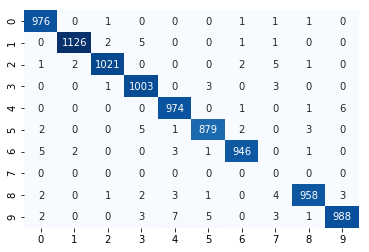

1/50 Epoch, Train/Test Loss: 0.0155/0.0725,         Train/Test Accuracy: 0.9943/0.9824,         Elapsed/Remaining time: 0.11/5.30 [min]
2/50 Epoch, Train/Test Loss: 0.0048/0.0593,         Train/Test Accuracy: 0.9982/0.9870,         Elapsed/Remaining time: 0.23/5.45 [min]
3/50 Epoch, Train/Test Loss: 0.0137/0.0832,         Train/Test Accuracy: 0.9951/0.9826,         Elapsed/Remaining time: 0.34/5.26 [min]
4/50 Epoch, Train/Test Loss: 0.0040/0.0615,         Train/Test Accuracy: 0.9987/0.9867,         Elapsed/Remaining time: 0.44/5.09 [min]
5/50 Epoch, Train/Test Loss: 0.0019/0.0629,         Train/Test Accuracy: 0.9993/0.9872,         Elapsed/Remaining time: 0.54/4.89 [min]
6/50 Epoch, Train/Test Loss: 0.0034/0.0699,         Train/Test Accuracy: 0.9989/0.9866,         Elapsed/Remaining time: 0.66/4.82 [min]
7/50 Epoch, Train/Test Loss: 0.0022/0.0779,         Train/Test Accuracy: 0.9993/0.9852,         Elapsed/Remaining time: 0.76/4.66 [min]
8/50 Epoch, Train/Test Loss: 0.0059/0.0784,     

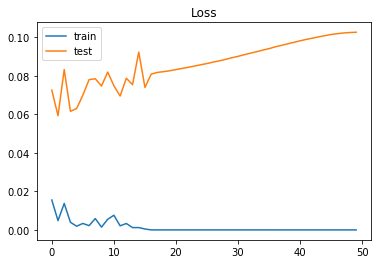

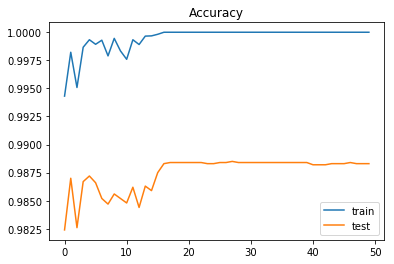

Accuracy: 0.9885


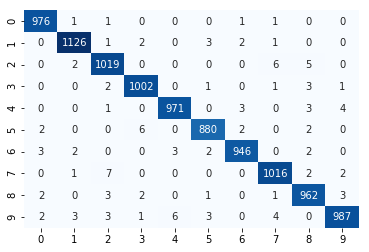

Accuracy: 0.9885198395006688


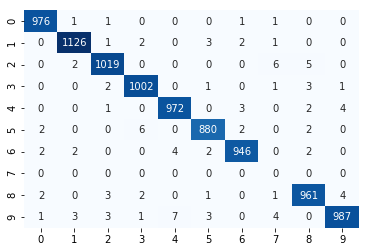

1/50 Epoch, Train/Test Loss: 0.0091/0.0602,         Train/Test Accuracy: 0.9970/0.9864,         Elapsed/Remaining time: 0.09/4.65 [min]
2/50 Epoch, Train/Test Loss: 0.0070/0.0637,         Train/Test Accuracy: 0.9978/0.9859,         Elapsed/Remaining time: 0.18/4.34 [min]
3/50 Epoch, Train/Test Loss: 0.0038/0.0630,         Train/Test Accuracy: 0.9988/0.9860,         Elapsed/Remaining time: 0.26/4.10 [min]
4/50 Epoch, Train/Test Loss: 0.0038/0.0594,         Train/Test Accuracy: 0.9987/0.9865,         Elapsed/Remaining time: 0.35/3.98 [min]
5/50 Epoch, Train/Test Loss: 0.0017/0.0641,         Train/Test Accuracy: 0.9995/0.9869,         Elapsed/Remaining time: 0.44/3.98 [min]
6/50 Epoch, Train/Test Loss: 0.0056/0.0792,         Train/Test Accuracy: 0.9980/0.9848,         Elapsed/Remaining time: 0.54/3.95 [min]
7/50 Epoch, Train/Test Loss: 0.0067/0.0712,         Train/Test Accuracy: 0.9977/0.9836,         Elapsed/Remaining time: 0.62/3.82 [min]
8/50 Epoch, Train/Test Loss: 0.0016/0.0706,     

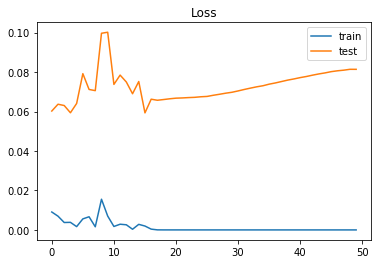

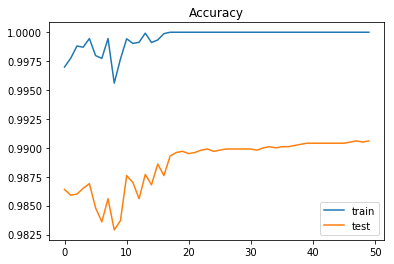

Accuracy: 0.9906


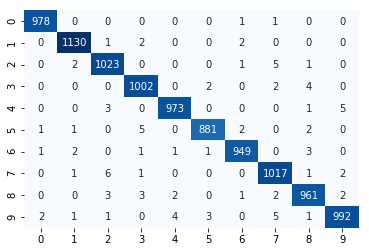

Accuracy: 0.9906375390102541


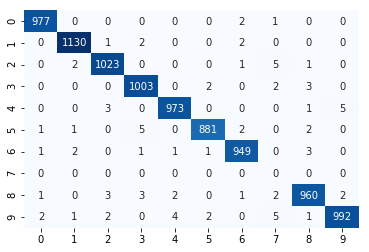

1/50 Epoch, Train/Test Loss: 0.0097/0.0714,         Train/Test Accuracy: 0.9968/0.9844,         Elapsed/Remaining time: 0.09/4.39 [min]
2/50 Epoch, Train/Test Loss: 0.0168/0.0865,         Train/Test Accuracy: 0.9954/0.9826,         Elapsed/Remaining time: 0.17/4.17 [min]
3/50 Epoch, Train/Test Loss: 0.0046/0.0626,         Train/Test Accuracy: 0.9986/0.9859,         Elapsed/Remaining time: 0.26/4.15 [min]
4/50 Epoch, Train/Test Loss: 0.0066/0.0782,         Train/Test Accuracy: 0.9978/0.9842,         Elapsed/Remaining time: 0.35/4.02 [min]
5/50 Epoch, Train/Test Loss: 0.0031/0.0723,         Train/Test Accuracy: 0.9990/0.9863,         Elapsed/Remaining time: 0.44/3.92 [min]
6/50 Epoch, Train/Test Loss: 0.0046/0.0740,         Train/Test Accuracy: 0.9984/0.9854,         Elapsed/Remaining time: 0.52/3.83 [min]
7/50 Epoch, Train/Test Loss: 0.0023/0.0699,         Train/Test Accuracy: 0.9993/0.9860,         Elapsed/Remaining time: 0.60/3.71 [min]
8/50 Epoch, Train/Test Loss: 0.0012/0.0654,     

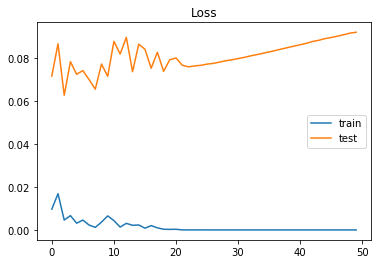

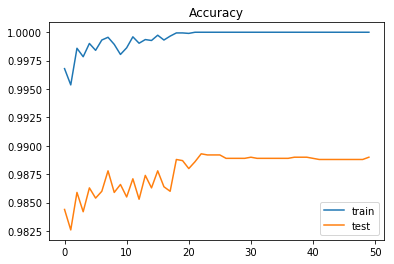

Accuracy: 0.9893


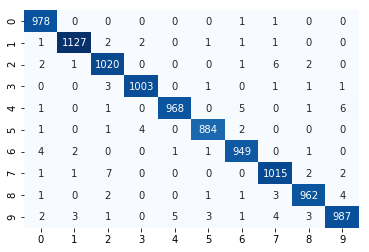

Accuracy: 0.9895229603209986


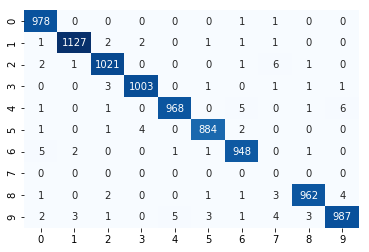

1/50 Epoch, Train/Test Loss: 0.0091/0.0690,         Train/Test Accuracy: 0.9968/0.9843,         Elapsed/Remaining time: 0.10/4.72 [min]
2/50 Epoch, Train/Test Loss: 0.0042/0.0636,         Train/Test Accuracy: 0.9987/0.9862,         Elapsed/Remaining time: 0.18/4.43 [min]
3/50 Epoch, Train/Test Loss: 0.0065/0.0676,         Train/Test Accuracy: 0.9978/0.9858,         Elapsed/Remaining time: 0.29/4.54 [min]
4/50 Epoch, Train/Test Loss: 0.0033/0.0603,         Train/Test Accuracy: 0.9988/0.9869,         Elapsed/Remaining time: 0.38/4.32 [min]
5/50 Epoch, Train/Test Loss: 0.0051/0.0647,         Train/Test Accuracy: 0.9982/0.9863,         Elapsed/Remaining time: 0.45/4.05 [min]
6/50 Epoch, Train/Test Loss: 0.0094/0.0781,         Train/Test Accuracy: 0.9968/0.9844,         Elapsed/Remaining time: 0.53/3.88 [min]
7/50 Epoch, Train/Test Loss: 0.0036/0.0653,         Train/Test Accuracy: 0.9990/0.9869,         Elapsed/Remaining time: 0.61/3.76 [min]
8/50 Epoch, Train/Test Loss: 0.0011/0.0669,     

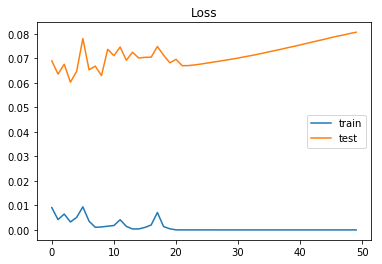

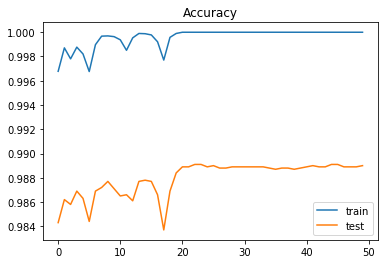

Accuracy: 0.9891


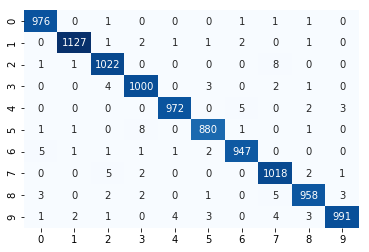

Accuracy: 0.9888542131074454


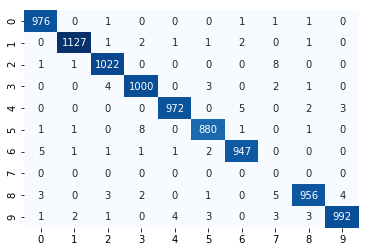

1/50 Epoch, Train/Test Loss: 0.0271/0.0866,         Train/Test Accuracy: 0.9921/0.9816,         Elapsed/Remaining time: 0.10/4.77 [min]
2/50 Epoch, Train/Test Loss: 0.0068/0.0693,         Train/Test Accuracy: 0.9976/0.9843,         Elapsed/Remaining time: 0.19/4.46 [min]
3/50 Epoch, Train/Test Loss: 0.0129/0.0762,         Train/Test Accuracy: 0.9954/0.9850,         Elapsed/Remaining time: 0.30/4.69 [min]
4/50 Epoch, Train/Test Loss: 0.0053/0.0651,         Train/Test Accuracy: 0.9982/0.9858,         Elapsed/Remaining time: 0.39/4.49 [min]
5/50 Epoch, Train/Test Loss: 0.0031/0.0628,         Train/Test Accuracy: 0.9990/0.9883,         Elapsed/Remaining time: 0.51/4.63 [min]
6/50 Epoch, Train/Test Loss: 0.0086/0.0721,         Train/Test Accuracy: 0.9972/0.9869,         Elapsed/Remaining time: 0.60/4.40 [min]
7/50 Epoch, Train/Test Loss: 0.0063/0.0826,         Train/Test Accuracy: 0.9978/0.9840,         Elapsed/Remaining time: 0.68/4.19 [min]
8/50 Epoch, Train/Test Loss: 0.0011/0.0727,     

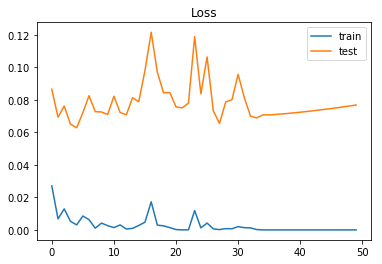

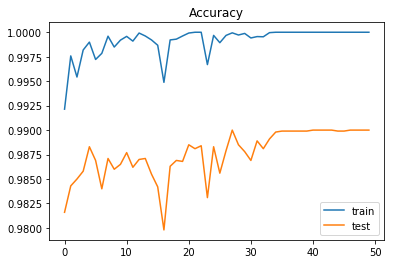

Accuracy: 0.99


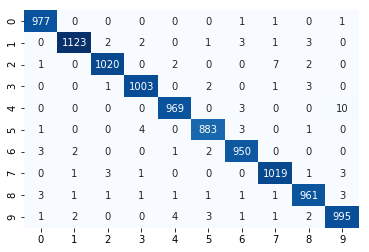

Accuracy: 0.9898573339277753


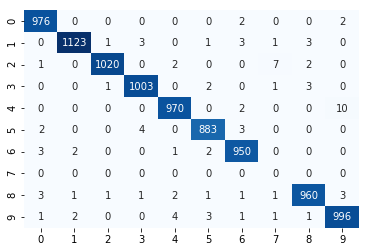

1/50 Epoch, Train/Test Loss: 0.0112/0.0589,         Train/Test Accuracy: 0.9962/0.9864,         Elapsed/Remaining time: 0.10/4.66 [min]
2/50 Epoch, Train/Test Loss: 0.0077/0.0625,         Train/Test Accuracy: 0.9975/0.9851,         Elapsed/Remaining time: 0.18/4.40 [min]
3/50 Epoch, Train/Test Loss: 0.0104/0.0662,         Train/Test Accuracy: 0.9967/0.9850,         Elapsed/Remaining time: 0.26/4.15 [min]
4/50 Epoch, Train/Test Loss: 0.0039/0.0662,         Train/Test Accuracy: 0.9989/0.9874,         Elapsed/Remaining time: 0.36/4.09 [min]
5/50 Epoch, Train/Test Loss: 0.0041/0.0573,         Train/Test Accuracy: 0.9985/0.9872,         Elapsed/Remaining time: 0.44/3.94 [min]
6/50 Epoch, Train/Test Loss: 0.0018/0.0517,         Train/Test Accuracy: 0.9994/0.9894,         Elapsed/Remaining time: 0.54/3.96 [min]
7/50 Epoch, Train/Test Loss: 0.0057/0.0724,         Train/Test Accuracy: 0.9979/0.9867,         Elapsed/Remaining time: 0.64/3.93 [min]
8/50 Epoch, Train/Test Loss: 0.0030/0.0572,     

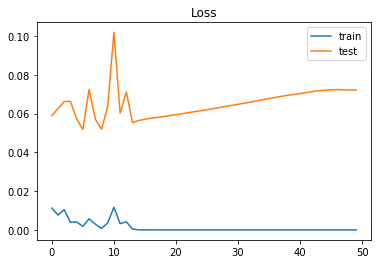

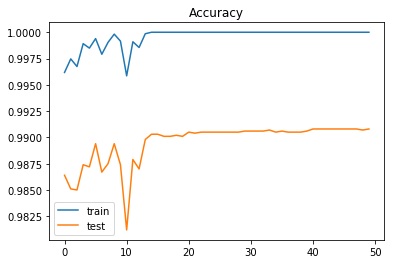

Accuracy: 0.9908


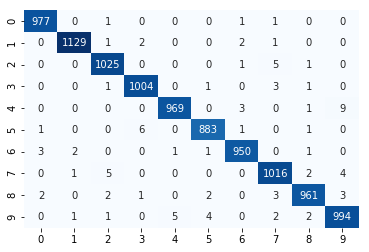

Accuracy: 0.9911948283548818


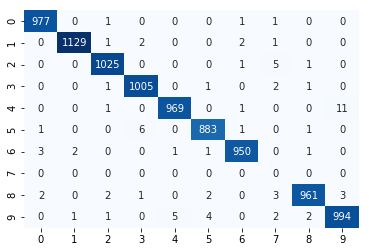

1/50 Epoch, Train/Test Loss: 0.0092/0.0680,         Train/Test Accuracy: 0.9971/0.9857,         Elapsed/Remaining time: 0.08/3.71 [min]
2/50 Epoch, Train/Test Loss: 0.0058/0.0666,         Train/Test Accuracy: 0.9977/0.9859,         Elapsed/Remaining time: 0.16/3.86 [min]
3/50 Epoch, Train/Test Loss: 0.0046/0.0714,         Train/Test Accuracy: 0.9985/0.9849,         Elapsed/Remaining time: 0.26/4.09 [min]
4/50 Epoch, Train/Test Loss: 0.0039/0.0720,         Train/Test Accuracy: 0.9987/0.9857,         Elapsed/Remaining time: 0.34/3.96 [min]
5/50 Epoch, Train/Test Loss: 0.0014/0.0634,         Train/Test Accuracy: 0.9996/0.9871,         Elapsed/Remaining time: 0.43/3.85 [min]
6/50 Epoch, Train/Test Loss: 0.0046/0.0578,         Train/Test Accuracy: 0.9984/0.9874,         Elapsed/Remaining time: 0.51/3.74 [min]
7/50 Epoch, Train/Test Loss: 0.0008/0.0639,         Train/Test Accuracy: 0.9997/0.9880,         Elapsed/Remaining time: 0.59/3.64 [min]
8/50 Epoch, Train/Test Loss: 0.0070/0.0742,     

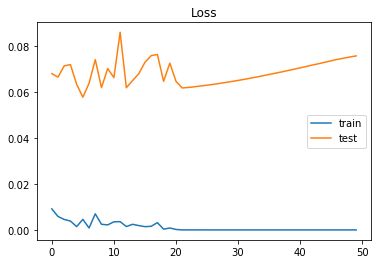

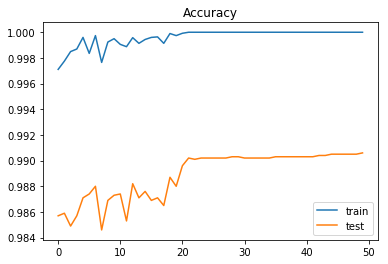

Accuracy: 0.9906


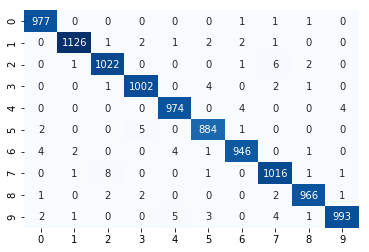

Accuracy: 0.9899687917967008


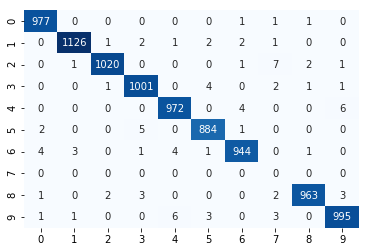

In [11]:
# result output folder
out = os.path.join('results', 'fine_tuned_model_base')
os.makedirs(os.path.join(out), exist_ok=True)

acc = {'clean_test':[], 'poison_test':[]}
# 1000 to 10000
for N in range(1000, 10000+1, 1000):
    out2 = os.path.join(out, '{}'.format(N))
    os.makedirs(out2, exist_ok=True)

    ds_root = os.path.join('.', 'results', 'datasets')
    tr = np.load(os.path.join('.', 'results', 'screening_base', '{}'.format(N), 'screening_negative_dataset.npz'))
    train_ds = bd.Dataset_from_array(x=tr['x'], t=tr['t'], transform=transform)
    train_dl = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

    # Model
    model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    model(dummy_input)
    model.load_state_dict(torch.load(os.path.join('results', 'distilled_model_base', '{}'.format(N), 'best_model.pt')))
    model = model.eval()

    # Train
    trainer = bd.Trainer(train_dl, test_dl, model, device)
    optimizer = torch.optim.Adam
    epoch = 50

    trainer.run(optimizer, epoch, out2)

    # Save result
    torch.save(model.state_dict(), os.path.join(out2, 'final_model.pt'))

    np.savez(os.path.join(out2, 'log.npz'), **trainer.log)

    # Plot and save log figures
    log = np.load(os.path.join(out2, 'log.npz'))
    bd.plot_util.plot_training_logs(log, out2)

    val_model = net.CNV()
    dummy_input = torch.Tensor(np.zeros((1, 1, 28, 28)).astype(np.float32))
    val_model(dummy_input)
    val_model.load_state_dict(torch.load(os.path.join(out2, 'best_model.pt')))
    val_model = val_model.eval()

    evaluator = bd.Evaluator(val_model, 10, device=device)

    # Evaluation against clean dataset
    ret = evaluator.run(
        test_dl,
        out=os.path.join(out2, 'clean_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['clean_test'].append(ret[1])

    # Evaluation against poison dataset
    ret = evaluator.run(
        test_p_dl,
        out=os.path.join(out2, 'poison_test'),
        cmap='Blues',
        fmt='d',
        annot=True,
        cbar=False
    )
    acc['poison_test'].append(ret[1])

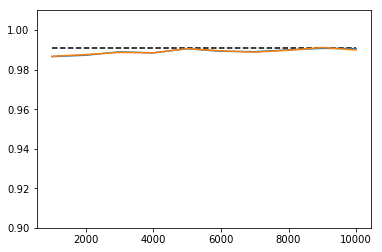

In [12]:
np.savez(os.path.join(out, 'log.npz'), **acc)

baseline_log = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_log['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), acc['clean_test'])
plt.plot(range(1000, 10000+1, 1000), acc['poison_test'])
plt.ylim(0.9, 1.01)
plt.show()

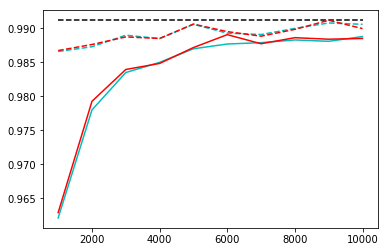

In [13]:
baseline_clean = np.load(os.path.join('results', 'baseline_model', 'clean_test.npz'))
#baseline_poison = 
distill = np.load(os.path.join('results', 'distilled_model_base', 'log.npz'))
fine_tune = np.load(os.path.join('results', 'fine_tuned_model_base', 'log.npz'))


plt.plot(range(1000, 10000+1, 1000), np.ones(10)*baseline_clean['accuracy'], 'k--')
plt.plot(range(1000, 10000+1, 1000), distill['clean_test'], 'c')
plt.plot(range(1000, 10000+1, 1000), distill['poison_test'], 'r')
plt.plot(range(1000, 10000+1, 1000), fine_tune['clean_test'], 'c--')
plt.plot(range(1000, 10000+1, 1000), fine_tune['poison_test'], 'r--')
plt.show()